# Movie recommendation system

###### I'm using the Movies Dataset from kaggle (https://www.kaggle.com/rounakbanik/the-movies-dataset). 
Here I'll try using three types of algorithm to build a recommendation system for movie platform

###### Types of filtering
##### 1. Demographic based Filtering: 
    It is a generalised type of filtering based on its popularity/ rating. These movies can be placed under 'trending now' which will be common for all the users 
##### 2. Content Based Filtering: 
    This type of filtering takes into a little bit of NLP and suggest movies to the user based on their search feature, for eg, movies are filtered according to genre, similar reviews etc. ie. if a person like movie A then there's a high chance that the person might like movie B that is similar to it.
#### 3. Collaborative Filtering: 
    It provides more personally biased suggestions. It uses the data of person whose taste is more similar to mine to predict the movies that I might like.

#### Importing the desired packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Lets load the data now and get a peek at the data 

In [3]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Making sure we dont have any Null value and replacing it by empty space.
We'll concatenate overview, tagline columns to one as call it as review 

In [6]:
credits.columns = ['id','tittle','cast','crew']
movies = movies.merge(credits,on='id')
movies['overview'] = movies['overview'].fillna('')
movies['tagline'] = movies['tagline'].fillna('')
movies['review'] = movies['tagline'] + movies['overview']
movies.drop(['overview','tagline','tittle'], axis = 1)
movies.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew', 'review'],
      dtype='object')

In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,review
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Enter the World of Pandora.In the 22nd century...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","At the end of the world, the adventure begins...."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A Plan No One EscapesA cryptic message from Bo...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Legend EndsFollowing the death of District...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Lost in our world, found in another.John Carte..."


# Demographic Filtering

We need a metric for filtering out the movies. So we will calculate a weighted rating using below formula

Weighted Rating(WR) = v*R/(v+m) + m*C/(v+m)

where 
v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report

In [8]:
v_avg = movies[movies['vote_average'].notnull()]['vote_average'].astype('int').mean()
print(v_avg)
v_count = movies[movies['vote_count'].notnull()]['vote_average'].astype('int').quantile(0.9)
print(v_count)

5.6529252550489275
7.0


In [9]:
#filtering out the qualified movies
qual_movies = movies.copy().loc[movies['vote_count'] >= v_count]
qual_movies.shape

(4492, 24)

In [10]:
def weighted_rating(df, C = v_avg, m = v_count):
    v = df['vote_count']
    R = df['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qual_movies['score'] = qual_movies.apply(weighted_rating, axis = 1)
qual_movies.sort_values('score', ascending = False)
qual_movies[['title','vote_count','vote_average', 'score']].head()
qual_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
tittle                   object
cast                     object
crew                     object
review                   object
score                   float64
dtype: object

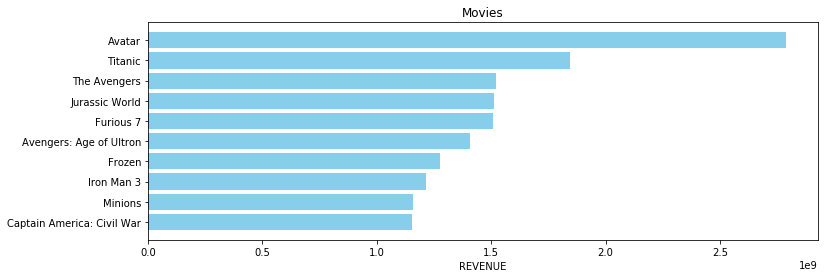

In [12]:
def chart_builder(x, string):
    if x[str(string)].dtype == 'float64' or x[str(string)].dtype == 'int64':
        df = x.sort_values(str(string), ascending = False)
        plt.figure(figsize=(12,4))
        plt.barh(df['title'].head(10),df[str(string)].head(10), align='center', color='skyblue')
        #plt.xticks(range(min(df[str(string)]), max(df[str(string)]) + 1.0))
        plt.gca().invert_yaxis() 
        plt.xlabel(str(string).upper())
        plt.title("Movies")
    else:
        df = x.sort_values('popularity', ascending = False)
        plt.figure(figsize=(12,4))
        plt.barh(df['title'].head(10),df['popularity'].head(10), align='center', color='skyblue')
        #plt.xticks(range(min(df['popularity']), max(df['popularity']) + 1.0))
        plt.gca().invert_yaxis() 
        plt.xlabel('Popularity')
        plt.title("Movies")

chart_builder(qual_movies, 'revenue')

# Content Based Recommender

In [14]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['review'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

#compute the cosinie similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index = movies['title']).drop_duplicates()

In [29]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim = cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print(movie_indices[:])
    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [30]:
get_recommendations('The Dark Knight Rises')

[299, 65, 428, 1359, 3854, 2507, 119, 210, 1181, 9]


299                              Batman Forever
65                              The Dark Knight
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
2507                                  Slow Burn
119                               Batman Begins
210                              Batman & Robin
1181                                        JFK
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object

The above table shows that the recommender system did a good job finding the movies which are similar to each other. This algorithm returns all the batman related movies.
I might add an updated version of this notebook where we'll use cast, genre and crew for more refinced suggestion of movies

# Collaborative Filtering

In [32]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [33]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

/Users/georgeboben/anaconda3/lib/python3.7/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Users/georgeboben/anaconda3/lib/python3.7/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8910
MAE:  0.6865
------------
Fold 2
RMSE: 0.8986
MAE:  0.6893
------------
Fold 3
RMSE: 0.9005
MAE:  0.6921
------------
Fold 4
RMSE: 0.8976
MAE:  0.6925
------------
Fold 5
RMSE: 0.8971
MAE:  0.6923
------------
------------
Mean RMSE: 0.8970
Mean MAE : 0.6905
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8910100623308068,
                             0.8985595565036579,
                             0.9005366424065036,
                             0.8976390715564421,
                             0.8970750466851137],
                            'mae': [0.6865415019273263,
                             0.6892855316841768,
                             0.6920546808204993,
                             0.692493840000638,
                             0.6922717366284057]})

In [34]:
trainset = data.build_full_trainset()
svd.train(trainset)

/Users/georgeboben/anaconda3/lib/python3.7/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [35]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [41]:
svd.predict(1,64)

Prediction(uid=1, iid=64, r_ui=None, est=2.0431317843868575, details={'was_impossible': False})

For movie with ID 64, we get an estimated prediction of 2.043. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie

# Hybrid System


In this section, I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

Input: User ID and the Title of a Movie
Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [171]:
def hybrid(userId, title):
    idx = indices[title]
    #tmdbId = id_map.loc[title]['id']
    #print(idx)
    #movie_id = id_map.loc[title]['movieId']
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:50]
    
    movie_ind = [i[0] for i in sim_scores]
    
    movies_sugg = movies.iloc[movie_ind][['title','vote_average','vote_count', 'id']]
    #print(movies_sugg)
    
    movies_sugg['estimated rating'] = movies_sugg['id'].apply(lambda x: svd.predict(userId, x).est)
    
    movies_sugg = movies_sugg.sort_values('estimated rating', ascending=False).head(10)

    return movies_sugg

In [179]:
hybrid(1,'Spectre')

,title,vote_average,vote_count,id,estimated rating
753,The Sentinel,5.8,225,5820,2.793495
1743,Octopussy,6.2,527,700,2.773245
1200,The Living Daylights,6.2,440,708,2.737663
3251,On Her Majesty's Secret Service,6.5,456,668,2.685721
3143,You Only Live Twice,6.5,531,667,2.683548
2675,The Spy Who Loved Me,6.6,507,691,2.678520
1343,Never Say Never Again,5.8,338,36670,2.642998
1642,Splice,5.5,671,37707,2.642998
1655,Chasing Liberty,6.1,152,14844,2.642998
170,The World Is Not Enough,6.0,862,36643,2.642998
